In [165]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

importation de la dataset

In [166]:
dataset = pd.read_csv('./dataset/boston.csv')
dataset = dataset.drop('Unnamed: 0',axis=1)
data = dataset.copy()

In [167]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* dimensions de la dataset

In [168]:
data.shape

(506, 14)

* visualisation des types de variables 

In [169]:
data.dtypes.value_counts()

float64    14
dtype: int64

verification des valeur manquantes

In [170]:
data.isna().sum().sum()

0

* verification des outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5b0cba2500>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5b0cba2020>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5b0cba0730>,
 'medians': [<matplotlib.lines.Line2D at 0x7f5b0cba2620>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b0cba3f70>,
 'means': []}

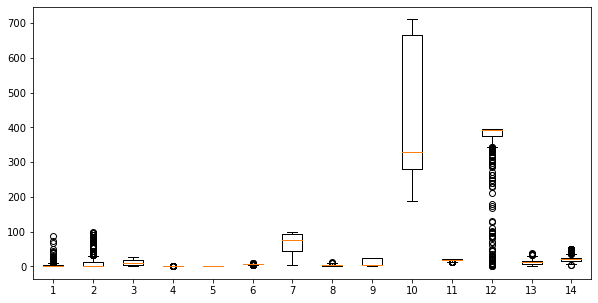

In [171]:
plt.figure(figsize=(10,5))
plt.boxplot(data)

* matrice de correlation

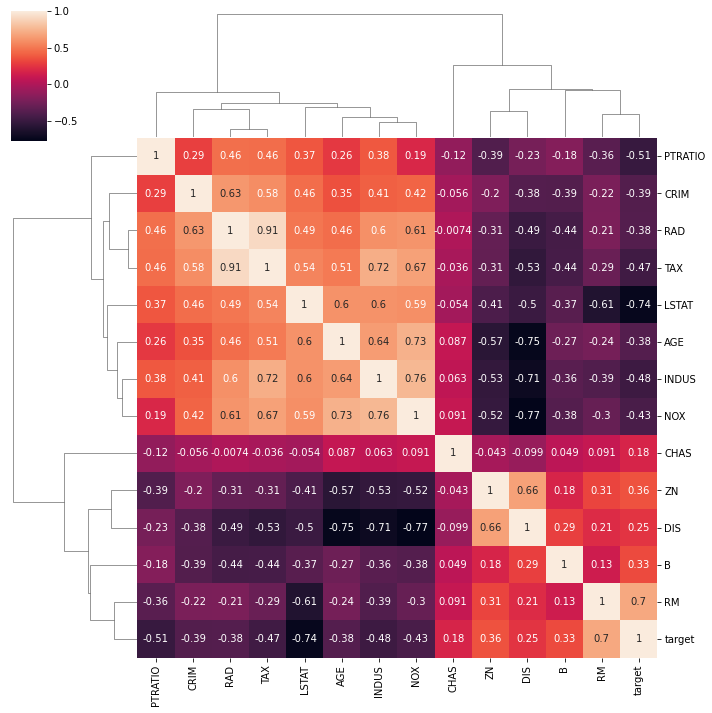

In [172]:
sns.clustermap(data.corr(),annot=True)

### feature importance

In [173]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

* segmentation de la dataset

In [174]:
x_train,x_test,y_train,y_test = train_test_split(data.drop('target',axis=1),data['target'],test_size=0.2,random_state=0)

### entrainement des donnees sans feature engineering

* definition des modeles

In [175]:
Random_model = RandomForestRegressor(random_state=0)
Linear = LinearRegression()

* entrainement des modeles

In [176]:
Random_model.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [177]:
Linear.fit(x_train,y_train)

LinearRegression()

In [178]:
Random_model.score(x_test,y_test)

0.7734908201180223

In [179]:
Linear.score(x_test,y_test)

0.5892223849182547

### feature ingineering

In [180]:
liste_score_R=[]
liste_random_state_R = []
model_R=[]
for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(data.drop('target',axis=1),
                                                     data['target'],test_size=0.2,random_state=i)
    Random_model.fit(x_train,y_train)
    liste_score_R.append(Random_model.score(x_test,y_test))
    liste_random_state_R.append(i)
    model_R.append(Random_model)
    

In [181]:
liste_score=[]
liste_random_state = []

for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(data.drop('target',axis=1),
                                                     data['target'],test_size=0.2,random_state=i)
    Linear.fit(x_train,y_train)
    liste_score.append(Linear.score(x_test,y_test))
    liste_random_state.append(i)
    

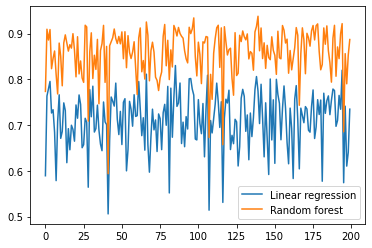

In [182]:
plt.plot(liste_random_state,liste_score,label='Linear regression')
plt.plot(liste_random_state_R,liste_score_R,label='Random forest')
plt.legend()

* ce graphe nous montre qu'on a de meilleurs resultat pour le Random forest

In [184]:
import numpy as np

* meilleur score pour la Regression Lineaire

In [186]:
np.array(liste_score).max()

0.8300388580559265

* meilleur score pour le random forest

In [187]:
np.array(liste_score_R).max()

0.9377120964037587

* on constate que le Random Foresest donne de meilleurs score aue la regression lineaire

### optimisation du Random Forest

* recherchons l'indice qui donne la meilleur performance pour le Random forest

In [188]:
indice = liste_score_R.index(np.array(liste_score_R).max())
indice

139

recherchons l'indice de ce score

In [189]:
x_train,x_test,y_train,y_test = train_test_split(data.drop('target',axis=1),
                                                     data['target'],test_size=0.2,random_state=indice)

In [190]:
Random_model.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [191]:
Random_model.score(x_test,y_test)

0.9377120964037587

* optimisation de RandomForestRegressor

In [192]:
from sklearn.model_selection import GridSearchCV

In [ ]:
Random_model.get_params()

In [200]:
param = {
        'random_state':[x for x in range(200)]}

In [201]:
grid = GridSearchCV(Random_model,param)

In [202]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]})

In [203]:
grid.best_params_

{'random_state': 160}

* meilleur score

In [204]:
grid.best_score_

0.8409777787539736

In [205]:
random_grid = grid.best_estimator_

In [206]:
random_grid.score(x_test,y_test)

0.9356311230140169